In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

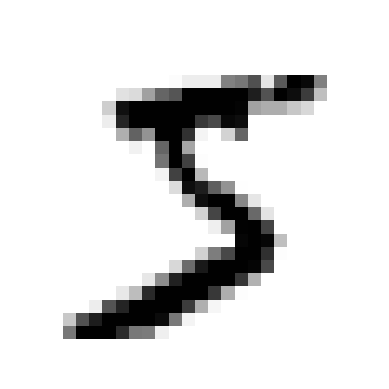

In [7]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()
# shows spooky number 5

In [8]:
y[0]
# yes, it's a 5, not an S

'5'

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

just gonna identify one thing: either it's a 5 or a non-5

In [10]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

KeyboardInterrupt: 

In [ ]:
sgd_clf.predict([some_digit])
# it predicted a 5!

## Preformance Measures

### Measuring Accuracy using Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

### Confusion Matrices

In [ ]:
from sklearn.model_selection import cross_val_predict

# performs k fold cross val, but instead of returning the eval score, it return the predictions made on each test fold.
# you get out of sample predictions on data
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

### Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

In [ ]:
recall_score(y_train_5, y_train_pred)

In [ ]:
f1_score(y_train_5, y_train_pred)

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")
plt.legend()
plt.title("Threshold")
plt.show()

In [ ]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.grid()
plt.show()

In [ ]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

In [ ]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

In [ ]:
recall_score(y_train_5, y_train_pred_90)

### ROC Curve

receiver operating characteristic curve.

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()

tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], 'ko', label="Threshold for 90% precision")
plt.legend()
plt.grid()
plt.ylabel("True Positive Rate (Recall)")
plt.xlabel("False Positive Rate (Fall-Out)")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [ ]:
y_probas_forest[:2]

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

In [ ]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()
plt.show()

In [ ]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5

In [ ]:
f1_score(y_train_5, y_train_pred_forest)

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
precision_score(y_train_5, y_train_pred_forest)

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

## Multiclass Classification

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

In [ ]:
svm_clf.predict([some_digit])

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

In [ ]:
class_id = some_digit_scores.argmax()
class_id

In [ ]:
svm_clf.classes_

In [ ]:
svm_clf.classes_[class_id]

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(SVC(random_state=42))
ovr.fit(X_train[:2000], y_train[:2000])


In [ ]:
ovr.predict([some_digit])

In [ ]:
len(ovr.estimators_)

In [14]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
sgd.predict([some_digit])

array(['3'], dtype='<U1')

In [15]:
sgd.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [ ]:
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [20]:
cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)

array([0.8983, 0.891 , 0.9018])

### Error Analysis

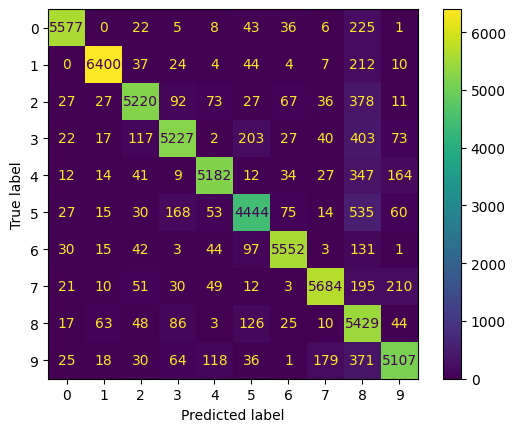

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd, X_train_scaled, y_train, cv=3, n_jobs=-1)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

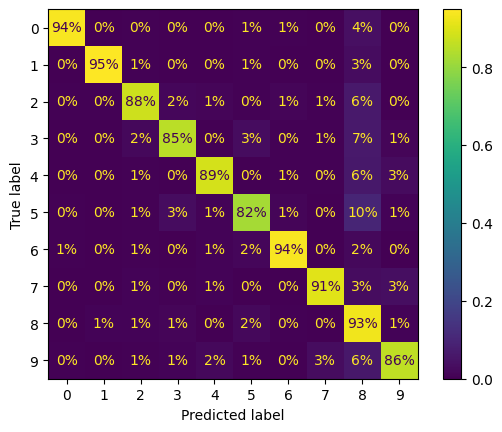

In [22]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

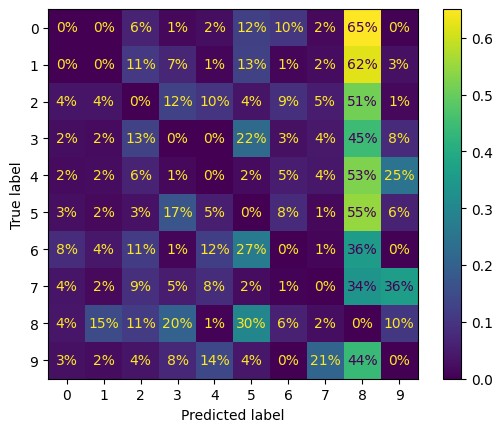

In [27]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

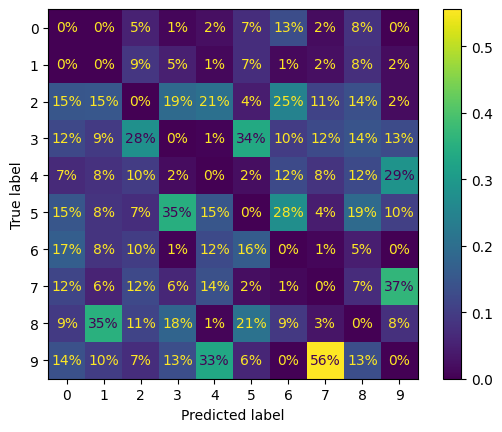

In [28]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%")
plt.show()

In [33]:
import numpy as np
import seaborn as sns

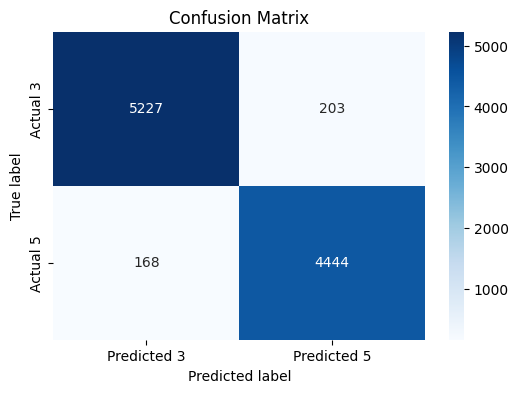

In [34]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

aa_count = X_aa.shape[0]
ab_count = X_ab.shape[0]
ba_count = X_ba.shape[0]
bb_count = X_bb.shape[0]

confusion_matrix = np.array([[aa_count, ab_count],
                             [ba_count, bb_count]])

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 3", "Predicted 5"],
            yticklabels=["Actual 3", "Actual 5"])
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Multilabel Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn = KNeighborsClassifier()
knn.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [36]:
knn.predict([some_digit])

array([[False,  True]])

In [38]:
y_train_knn_pred = cross_val_predict(knn, X_train, y_multilabel, cv=3, n_jobs=-1)

NameError: name 'f1_score' is not defined

In [40]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [41]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [48]:
from sklearn.multioutput import ClassifierChain

chain = ClassifierChain(SVC(), cv=3, random_state=42)
chain.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [49]:
chain.predict([some_digit])

array([[0., 1.]])

# Multioutput Classification

In [50]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

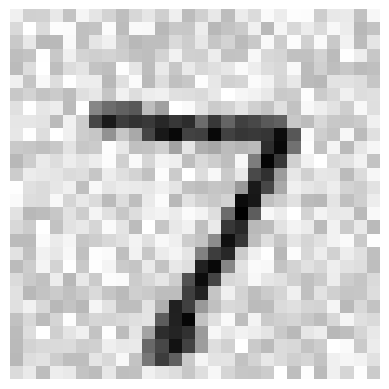

In [51]:
plot_digit(X_test_mod[0])

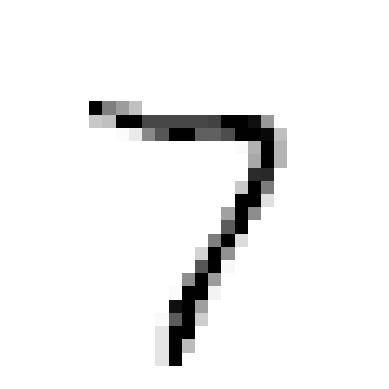

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train_mod, y_train_mod)
clean_digit = knn.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

### Thanks for watching plz liek xhare sub



# Dumb stuff

In [17]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [45]:
from sklearn.linear_model import SGDClassifier

In [39]:
from sklearn.metrics import f1_score

In [46]:
from sklearn.svm import SVC